In [19]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

The equations that need to be satisfied are

$$\cos(2 \theta')e^{-2 \theta'}-1-\frac{\hbar^2}{2m\alpha L} 2\theta''=0 \hspace{20mm} \sin(2\theta')e^{-2 \theta'}+\frac{\hbar^2}{2m\alpha L} 2\theta' = 0 $$

where $\theta'=k'L$ and $\theta''=k''L$. We will choose $\frac{\hbar^2}{2m\alpha L}=0.001$ (a small value) and plot the solutions of $\theta'$ and $\theta''$.

First we define our equations such that the function takes in the equation parameters and returns a tuple of equations which we wish to minimize.

In [41]:
C=0.001 #hbar^2/(2m\alpha L)

def equations(p):
    t1, t2 = p
    return (np.cos(2*t1)*np.exp(-2*t2)-1-2*C*t2, np.sin(2*t1)*np.exp(-2*t2) + 2*C*t1)

We solve the equations using scipys method fsolve. Since we argued previously that $\theta'=n\pi$ and $\theta''=0$, we use these values for our initial conditions. We choose 10 different intefer values for $n$.

In [68]:
x = np.empty(0)
y = np.empty(0)

for i in range(10):
    xi, yi =  fsolve(equations, ((i+1)*np.pi, 0.0001))
    x = np.append(x, xi); y=np.append(y,yi)

Plot solutions

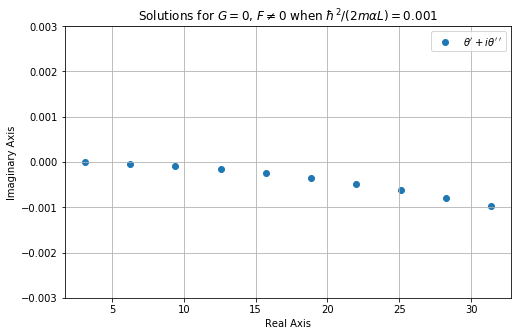

In [69]:
plt.figure(figsize=(8,5))
plt.scatter(x,y, label=r'$\theta^{\prime}+i\theta^{\prime \ \prime}$')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.ylim(-0.003,0.003)
plt.grid()
plt.legend()
plt.title(r'Solutions for $G=0$, $F\neq 0$ when $\hbar^2/(2m\alpha L) = 0.001$')
plt.show()

It appears that $k'' = \theta''/L$ becomes increasingly negative when $k'=\theta'/L$ increases. A particle with larger $k'$ has more energy if we consider the $\alpha=\infty$ spike (which corresponds to an infinite square well). Thus given a fixed $F$, since

$$Fe^{ikx} = Fe^{ik'x}e^{-k'' x} $$

particles with increasing positive $k'$ (and thus increasingly negative $k''$) are more likely to be found further to the right of the delta function spike.

